## Hiệu chuẩn cho từng cảm biến riêng lẻ

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


# Define all FSR sensor data in a dictionary
fsr_data = {
    'FSR1': {
        'weights': [0.2,0.7,1,1.5,2,2.5,4],
        'adc_values': [18443.33333, 18962.76667, 19494.03333, 20017.5, 20260.43333, 20433.1, 20758.1],
        'adc_errors': [717.7344936, 710.9783775, 393.5871737, 110.9140658, 76.48832155, 57.09527126, 38.10157477]

    },
    'FSR2': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [15920.77073,18854.57073,19733.1878,20188.87421,20425.68056,20718.125,20789.11111,21032.46181],  
        'adc_errors': [828.9607336,331.7675868,315.8738581,176.6277999,117.7325401,84.79515834,69.99090274,125.618267] 
    },
    'FSR3': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [16736.99261,19074.32443,19890.34375,20631.13011,21158.89091,21397.56136,21541.74091,21864.18182],
        'adc_errors': [395.2418411,327.4387145,327.7309511,288.2091396,236.4499735,112.8140473,61.67613828,41.1491435 ]
    },
    'FSR4': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [19262.4697,20635.12727,20924.42424,21200.89091,21370.48485,21398.36364,21548.66667,21751.0303],  
        'adc_errors': [162.906214,106.2463331,74.6405343,72.18221433,33.04446458,17.18566575,55.53327744,77.53326843]  
    },
    'FSR5': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [18484.01035, 20124.31237, 20492.63434, 20935.41894, 21114.75556, 21254.95556, 21384.81389, 21475.42222],
        'adc_errors': [374.4504819, 246.4547483, 147.8633068, 61.93219672, 37.07731329, 51.82650306, 45.31992483, 51.62198546]

    },
    'FSR6': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [15424.52,16947.84,17292.24,17863.38,18060.04,18157.84,18335.36,18480.52],
        'adc_errors': [227.6992139,200.0111822,197.8284434,192.1825096,222.2565702,266.9419469,166.9953682,157.9749727]


    },
    'FSR7': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [16473.43056, 18723.87778, 19254.57778, 19795.00833, 20033.85833, 20129.53056, 20305.63889, 20602.01667],
        'adc_errors': [990.1253094, 349.7843646, 196.2709985, 139.8333262, 130.9773597, 120.5879801, 62.39739726, 53.20126665]
    },
    'FSR8': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [17527.1, 19759.0, 19948.15, 20618.15, 20930.4, 21012.7, 21101.7, 21213.325],
        'adc_errors': [588.342423, 118.1081143, 197.0911887, 89.59592625, 76.69589298, 5.0484321, 64.2074762, 94.46210439]

    },
    'FSR9': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
       'adc_values': [12322.78, 13137.96, 13301.26, 13676.0, 13857.3, 13904.02, 13992.64, 14079.38],
        'adc_errors': [89.83677977, 15.10539639, 75.51015164, 52.24102794, 42.4844089, 68.10853104, 24.2901832, 36.58513359]


    },
    'FSR10': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [11777.1, 12732.45, 13041.55, 13380.875, 13475.575, 13598.75, 13707.0, 13770.9],
        'adc_errors': [255.4453758, 168.2375008, 63.88434863, 142.2073222, 72.08348748, 60.84003616, 13.6435577, 28.81053048]

    },
    'FSR11': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [11635.4, 12763.7, 13023.925, 13361.125, 13538.6, 13605.75, 13689.225, 13772.35],
        'adc_errors': [261.513607, 18.11960264, 55.52443156, 29.28758269, 12.43838146, 20.59004614, 23.96933805, 18.64090484]

    },
    'FSR13': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [12876.44,13682.68,13797.92,13971.5,14105.62,14130.62,14194.3,14282.9],
        'adc_errors': [34.89818047,53.11079928,46.48797694,67.44571892,82.60279656,78.64290814,56.43624722,42.06429602]
    },
    'FSR14': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [12539.25,13449.7,13569.475,13788.25,13956.525,14074.825,14096.15,14177.05],
        'adc_errors': [143.0241588,98.44785422,52.98958231,74.03321327,49.56405788,46.5899399,47.76012982,39.42330106]
    },
    'FSR15': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [15365.44,16428.42,16678.5,16995.48,17132.94,17296.72,17388.92,17482.24],
        'adc_errors': [274.3917692,200.5473311,130.9447593,133.9889995,160.0027125,86.69709914,47.84137331,36.46797225]
    },
    'FSR16': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [15708.1,16651.5,16838.225,17046.8,17154.825,17224.35,17284.875,17418.525],
        'adc_errors': [86.13071461,128.9488788,31.44501815,74.65909188,24.81133813,12.97189269,42.99351695,37.30347392]
    },
    'MIC1': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [12465.88,16316.54,17088.86,19363.68,20314.26,20722.82,21126.88,21545.98],
        'adc_errors': [237.3045132,494.9758307,328.3076575,228.3690588,292.6156575,129.6231731,104.6087329,55.99823211]
    },
    'MIC2': {
        'weights': [0.2,0.7,1,1.5,2,2.5,3,4],
        'adc_values': [18410.62,21517.08,22061.5,22695.68,23159.72,23381.7,23507.78,23698.8],
        'adc_errors': [1250.319128,205.6373021,208.0968525,201.8422651,185.3774528,187.4574618,203.9210632,191.6110644]
    }
}

def exp_func(y, a, b):
    return np.exp((y - b) / a)

def analyze_fsr(fsr_name):
   
    if fsr_name not in fsr_data:
        print(f"Error: {fsr_name} not found in the database.")
        return None
    
    # Get the data for this FSR
    data = fsr_data[fsr_name]
    weights = np.array(data['weights'])
    adc_values = np.array(data['adc_values'])
    adc_errors = np.array(data['adc_errors'])
    
    # Fit the exponential model
    try:
        params, covariance = curve_fit(exp_func, adc_values, weights, 
                                      p0=[1700, 19700])  # Initial guess
        a_fit, b_fit = params
    except RuntimeError as e:
        print(f"Error fitting curve: {e}")
        return None
    
    # Generate points for plotting
    adc_range = np.linspace(min(adc_values)*0.98, max(adc_values)*1.02, 200)
    weight_pred = exp_func(adc_range, a_fit, b_fit)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Add error bars to the scatter points
    plt.errorbar(weights, adc_values, yerr=adc_errors, fmt='o', color='blue',
                 ecolor='black', capsize=5, markersize=6, label='Data with errors')
    
    # Plot the fitted curve
    plt.plot(weight_pred, adc_range, 'r--', 
             label=f'WEIGHT = exp((ADC - {b_fit:.1f}) / {a_fit:.1f})')
    #saisố
    for x, y, err in zip(weights, adc_values, adc_errors):
        percent_error = (err / y) * 100
        plt.text(x, y + err + 100, f"{percent_error:.1f}%", fontsize=9,
                 color='darkgreen', ha='center')
    # Calculate R² for the model
    residuals = weights - exp_func(adc_values, a_fit, b_fit)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((weights - np.mean(weights))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    plt.plot([], [], ' ', label=f'R² = {r_squared:.4f}')
    
    # Add grid, labels, and title
    plt.grid(True)
    plt.xlabel('WEIGHT (kg)', fontsize=12)
    plt.ylabel('ADC', fontsize=12)
    plt.title(fsr_name, fontsize=14)
    plt.legend()
    plt.xlim(0, 5)
    # Show the plot
    plt.tight_layout()
    
    # Print model information
    print(f"{fsr_name} model: Cân nặng = exp((ADC - {b_fit:.2f}) / {a_fit:.2f})")
    print(f"R² score: {r_squared:.6f}")
    
    # Create table of predicted values
    test_adc = np.array([17000, 18000, 19000, 20000, 21000, 22000])
    predicted_weights = exp_func(test_adc, a_fit, b_fit)
    
    print("\nPredicted values:")
    for adc, weight in zip(test_adc, predicted_weights):
        print(f"ADC: {adc:.2f} → Cân nặng: {weight:.4f} kg")
    
    # Return the model parameters and function for reuse
    return {
        'a': a_fit,
        'b': b_fit,
        'r_squared': r_squared,
        'predict_function': lambda adc: exp_func(adc, a_fit, b_fit)
    }

FSR1 model: Cân nặng = exp((ADC - 19631.70) / 832.14)
R² score: 0.985300

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0423 kg
ADC: 18000.00 → Cân nặng: 0.1407 kg
ADC: 19000.00 → Cân nặng: 0.4681 kg
ADC: 20000.00 → Cân nặng: 1.5567 kg
ADC: 21000.00 → Cân nặng: 5.1774 kg
ADC: 22000.00 → Cân nặng: 17.2193 kg
For ADC = 18500, predicted weight = 0.2567 kg


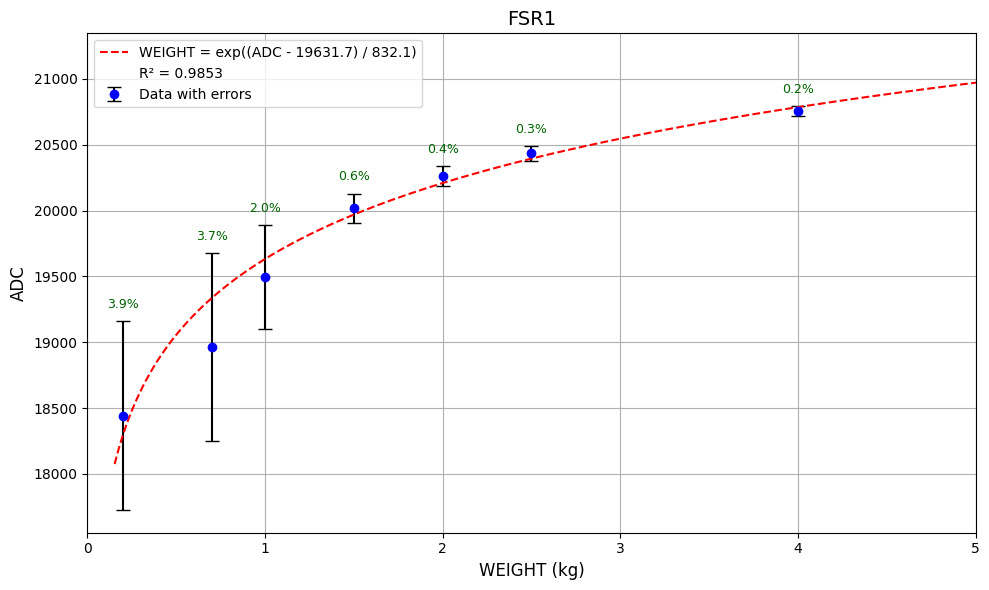

In [2]:
fsr1_model = analyze_fsr('FSR1')

new_adc = 18500
predicted_weight = fsr1_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR2 model: Cân nặng = exp((ADC - 19761.68) / 944.17)
R² score: 0.979506

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0537 kg
ADC: 18000.00 → Cân nặng: 0.1548 kg
ADC: 19000.00 → Cân nặng: 0.4463 kg
ADC: 20000.00 → Cân nặng: 1.2871 kg
ADC: 21000.00 → Cân nặng: 3.7119 kg
ADC: 22000.00 → Cân nặng: 10.7047 kg
For ADC = 18500, predicted weight = 0.2628 kg


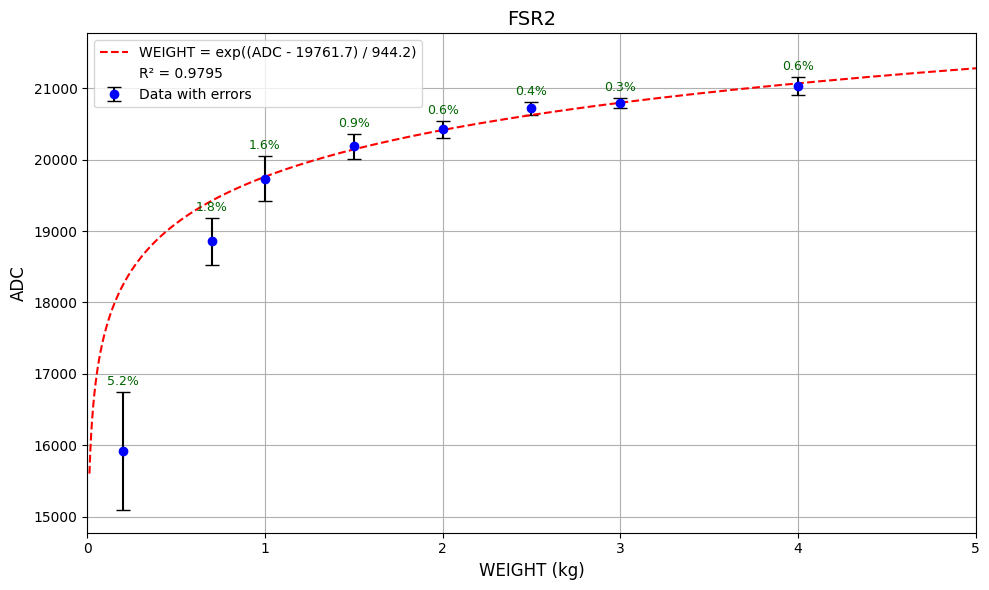

In [3]:
fsr2_model = analyze_fsr('FSR2')

new_adc = 18500
predicted_weight = fsr2_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR3 model: Cân nặng = exp((ADC - 20089.97) / 1327.13)
R² score: 0.980953

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0975 kg
ADC: 18000.00 → Cân nặng: 0.2070 kg
ADC: 19000.00 → Cân nặng: 0.4399 kg
ADC: 20000.00 → Cân nặng: 0.9345 kg
ADC: 21000.00 → Cân nặng: 1.9852 kg
ADC: 22000.00 → Cân nặng: 4.2174 kg
For ADC = 18500, predicted weight = 0.3018 kg


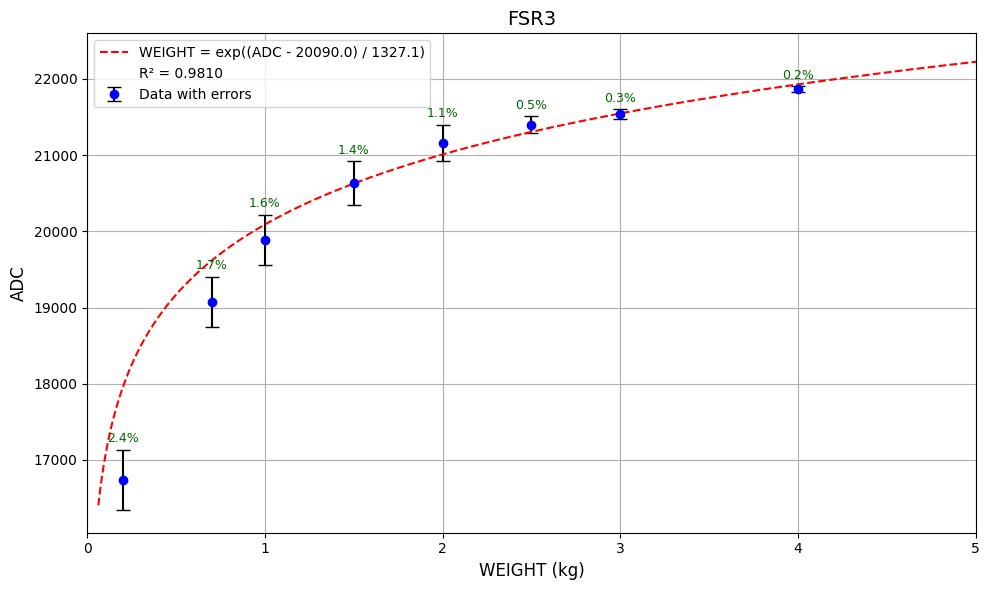

In [4]:

fsr3_model = analyze_fsr('FSR3')

# Make a prediction with the FSR3 model
new_adc = 18500
predicted_weight = fsr3_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR4 model: Cân nặng = exp((ADC - 20899.65) / 608.60)
R² score: 0.988063

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0016 kg
ADC: 18000.00 → Cân nặng: 0.0085 kg
ADC: 19000.00 → Cân nặng: 0.0441 kg
ADC: 20000.00 → Cân nặng: 0.2280 kg
ADC: 21000.00 → Cân nặng: 1.1793 kg
ADC: 22000.00 → Cân nặng: 6.0982 kg
For ADC = 18500, predicted weight = 0.0194 kg


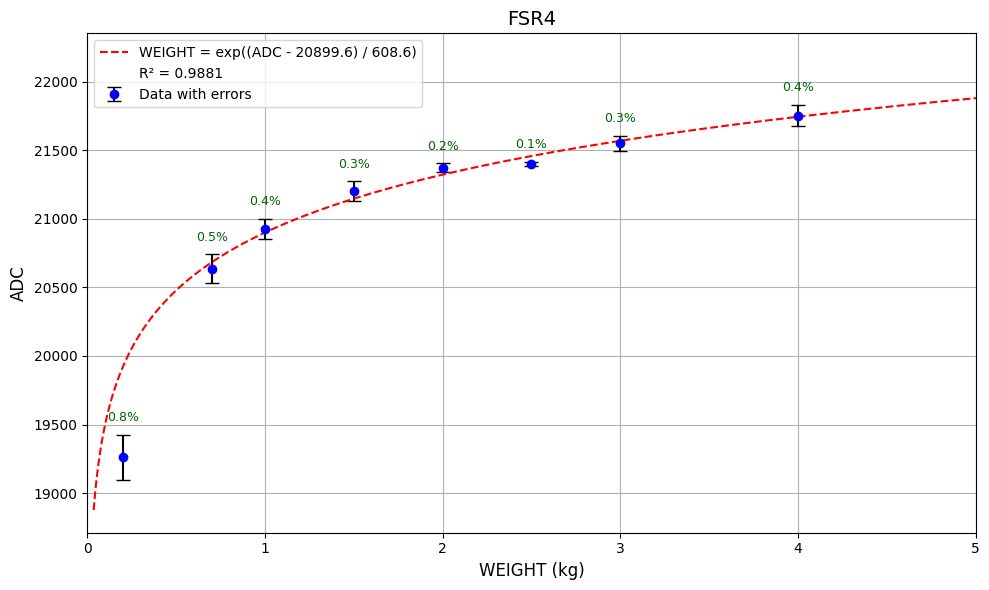

In [5]:
fsr4_model = analyze_fsr('FSR4')

new_adc = 18500
predicted_weight = fsr4_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR5 model: Cân nặng = exp((ADC - 20627.14) / 650.03)
R² score: 0.973357

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0038 kg
ADC: 18000.00 → Cân nặng: 0.0176 kg
ADC: 19000.00 → Cân nặng: 0.0818 kg
ADC: 20000.00 → Cân nặng: 0.3811 kg
ADC: 21000.00 → Cân nặng: 1.7746 kg
ADC: 22000.00 → Cân nặng: 8.2646 kg
For ADC = 18500, predicted weight = 0.0379 kg


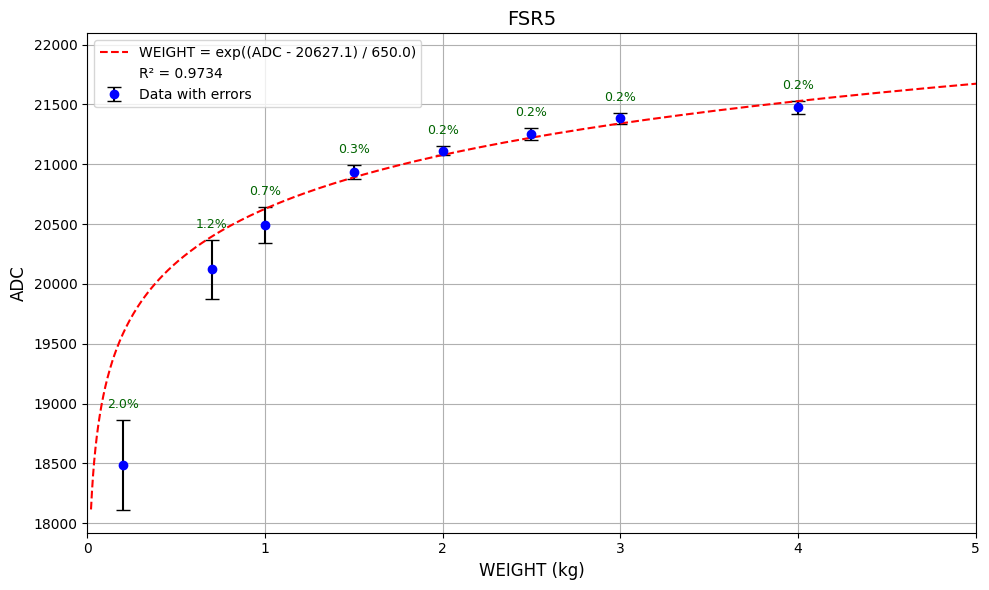

In [6]:
fsr5_model = analyze_fsr('FSR5')

new_adc = 18500
predicted_weight = fsr5_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR6 model: Cân nặng = exp((ADC - 17475.01) / 753.05)
R² score: 0.980029

Predicted values:
ADC: 17000.00 → Cân nặng: 0.5322 kg
ADC: 18000.00 → Cân nặng: 2.0080 kg
ADC: 19000.00 → Cân nặng: 7.5767 kg
ADC: 20000.00 → Cân nặng: 28.5887 kg
ADC: 21000.00 → Cân nặng: 107.8719 kg
ADC: 22000.00 → Cân nặng: 407.0260 kg


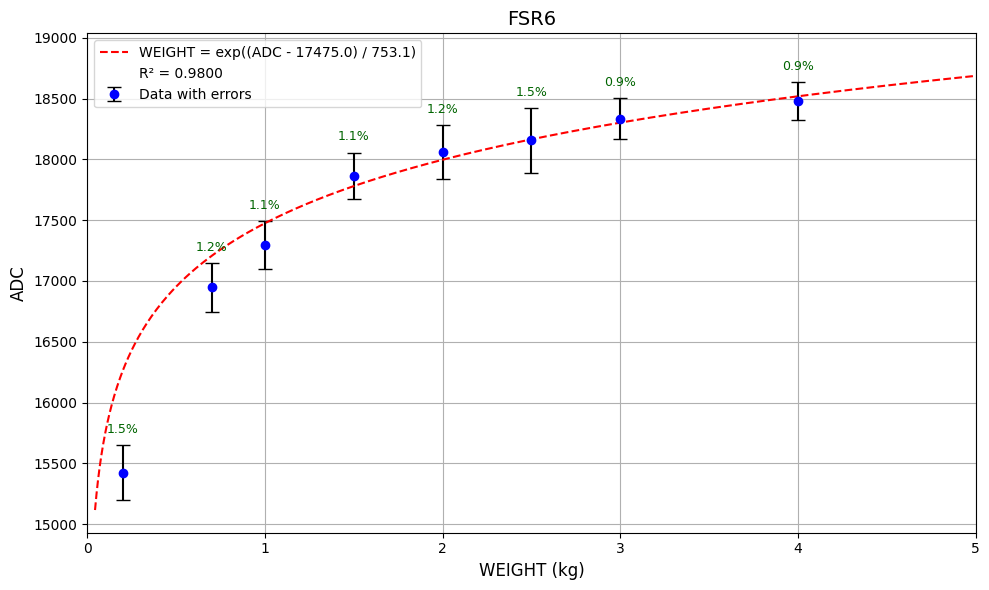

In [7]:
fsr6_model = analyze_fsr('FSR6')

new_adc = 18500
predicted_weight = fsr6_model['predict_function'](new_adc)

FSR7 model: Cân nặng = exp((ADC - 19310.27) / 933.02)
R² score: 0.988095

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0841 kg
ADC: 18000.00 → Cân nặng: 0.2455 kg
ADC: 19000.00 → Cân nặng: 0.7171 kg
ADC: 20000.00 → Cân nặng: 2.0944 kg
ADC: 21000.00 → Cân nặng: 6.1168 kg
ADC: 22000.00 → Cân nặng: 17.8649 kg
For ADC = 18500, predicted weight = 0.4196 kg


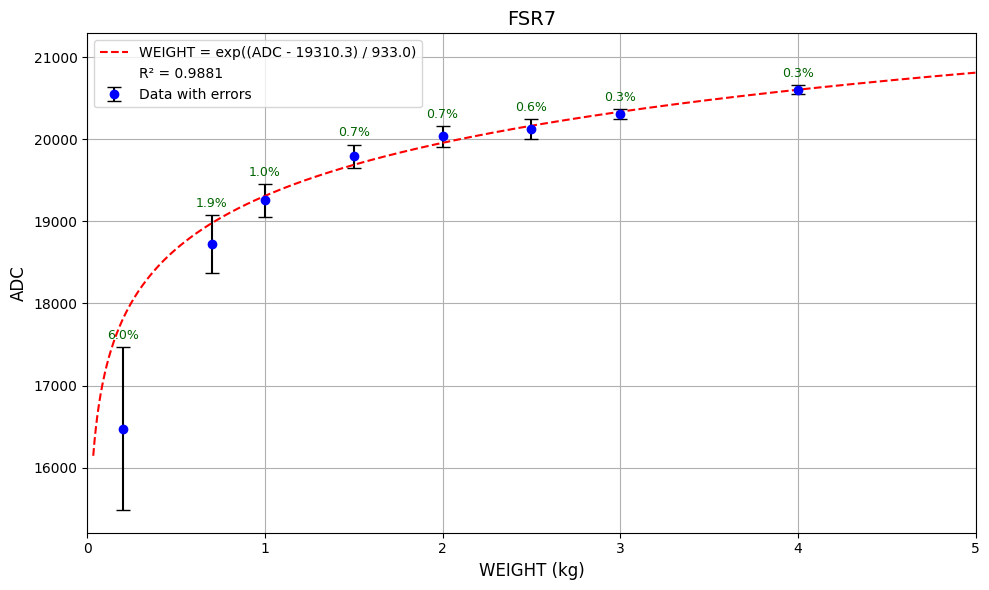

In [8]:
fsr7_model = analyze_fsr('FSR7')

new_adc = 18500
predicted_weight = fsr7_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR8 model: Cân nặng = exp((ADC - 20299.89) / 715.90)
R² score: 0.944031

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0100 kg
ADC: 18000.00 → Cân nặng: 0.0403 kg
ADC: 19000.00 → Cân nặng: 0.1627 kg
ADC: 20000.00 → Cân nặng: 0.6578 kg
ADC: 21000.00 → Cân nặng: 2.6590 kg
ADC: 22000.00 → Cân nặng: 10.7487 kg
For ADC = 18500, predicted weight = 0.0809 kg


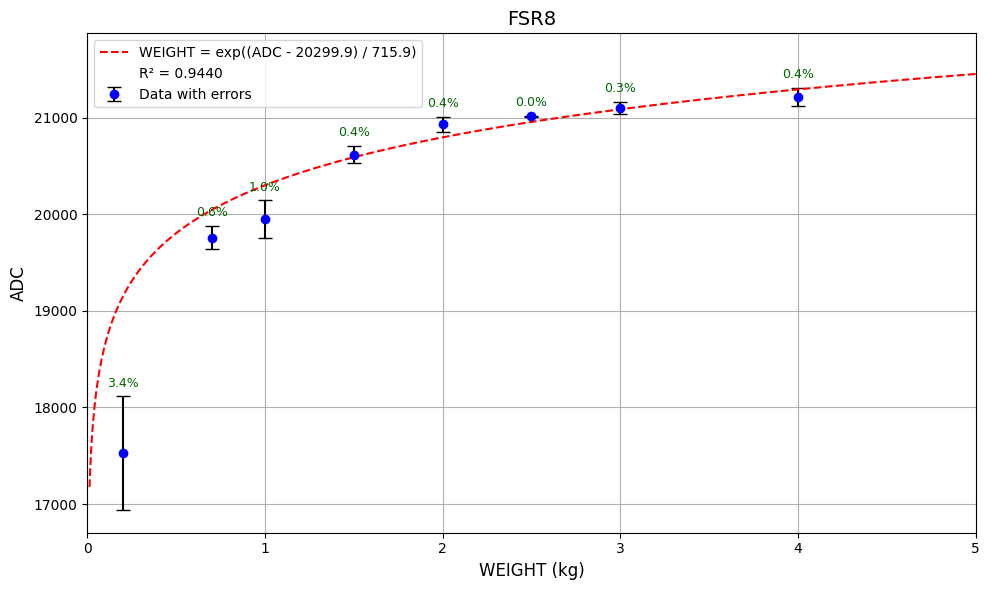

In [9]:
fsr8_model = analyze_fsr('FSR8')

new_adc = 18500
predicted_weight = fsr8_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR9 model: Cân nặng = exp((ADC - 13461.69) / 469.66)
R² score: 0.970381

Predicted values:
ADC: 17000.00 → Cân nặng: 1870.2870 kg
ADC: 18000.00 → Cân nặng: 15725.9737 kg
ADC: 19000.00 → Cân nặng: 132229.0410 kg
ADC: 20000.00 → Cân nặng: 1111824.2701 kg
ADC: 21000.00 → Cân nặng: 9348575.7632 kg
ADC: 22000.00 → Cân nặng: 78605829.3116 kg
For ADC = 18500, predicted weight = 45600.7722 kg


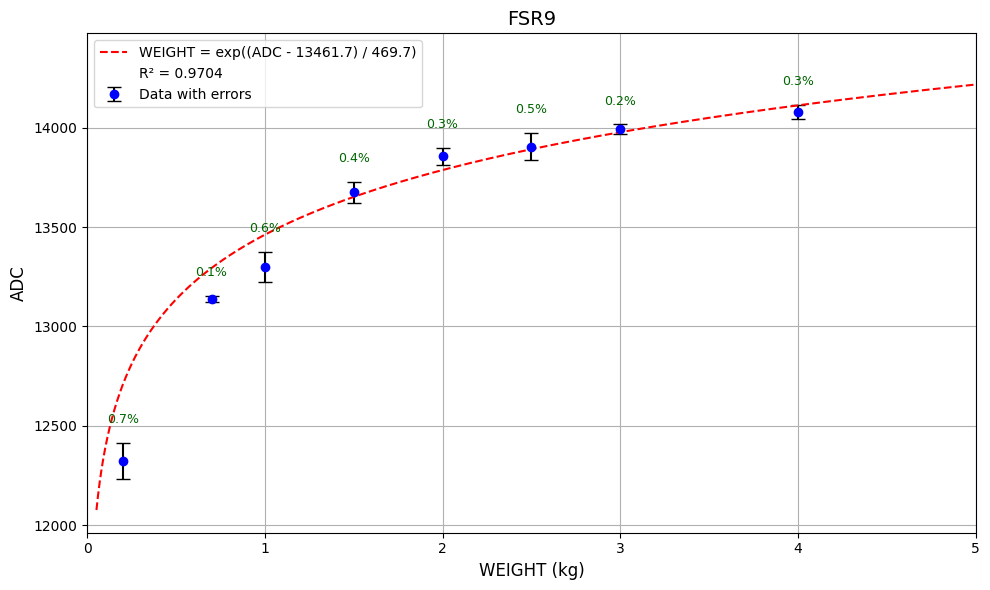

In [10]:
fsr9_model = analyze_fsr('FSR9')

new_adc = 18500
predicted_weight = fsr9_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR10 model: Cân nặng = exp((ADC - 13125.17) / 494.88)
R² score: 0.973208

Predicted values:
ADC: 17000.00 → Cân nặng: 2514.6406 kg
ADC: 18000.00 → Cân nặng: 18969.5667 kg
ADC: 19000.00 → Cân nặng: 143099.7575 kg
ADC: 20000.00 → Cân nặng: 1079494.3793 kg
ADC: 21000.00 → Cân nặng: 8143326.9743 kg
ADC: 22000.00 → Cân nặng: 61430402.4909 kg
For ADC = 18500, predicted weight = 52101.2513 kg


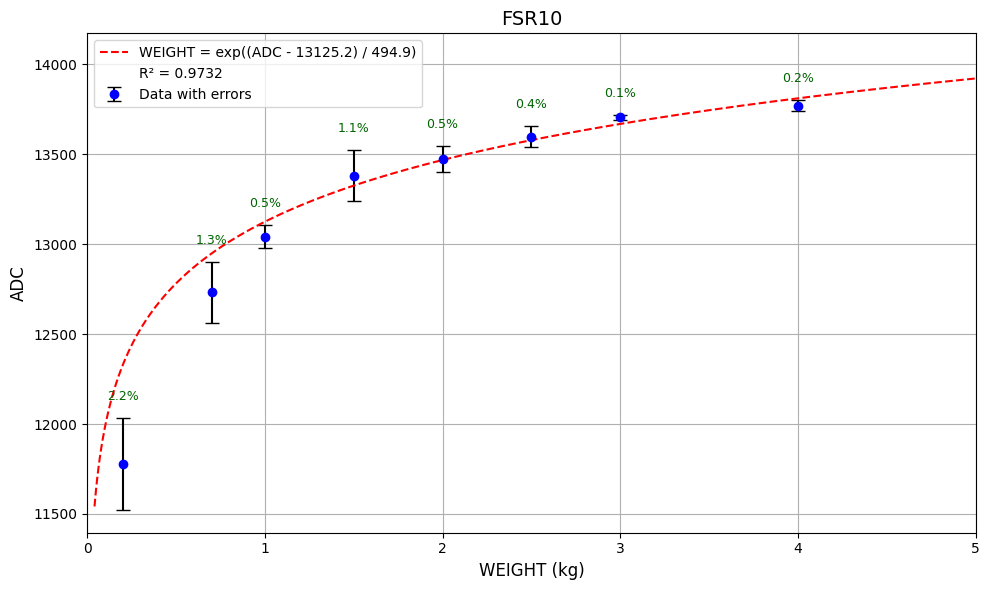

In [11]:
fsr10_model = analyze_fsr('FSR10')

new_adc = 18500
predicted_weight = fsr10_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR11 model: Cân nặng = exp((ADC - 13149.42) / 474.93)
R² score: 0.970715

Predicted values:
ADC: 17000.00 → Cân nặng: 3319.8116 kg
ADC: 18000.00 → Cân nặng: 27261.5436 kg
ADC: 19000.00 → Cân nặng: 223865.6455 kg
ADC: 20000.00 → Cân nặng: 1838334.1742 kg
ADC: 21000.00 → Cân nặng: 15095985.4922 kg
ADC: 22000.00 → Cân nặng: 123964827.0595 kg
For ADC = 18500, predicted weight = 78121.2074 kg


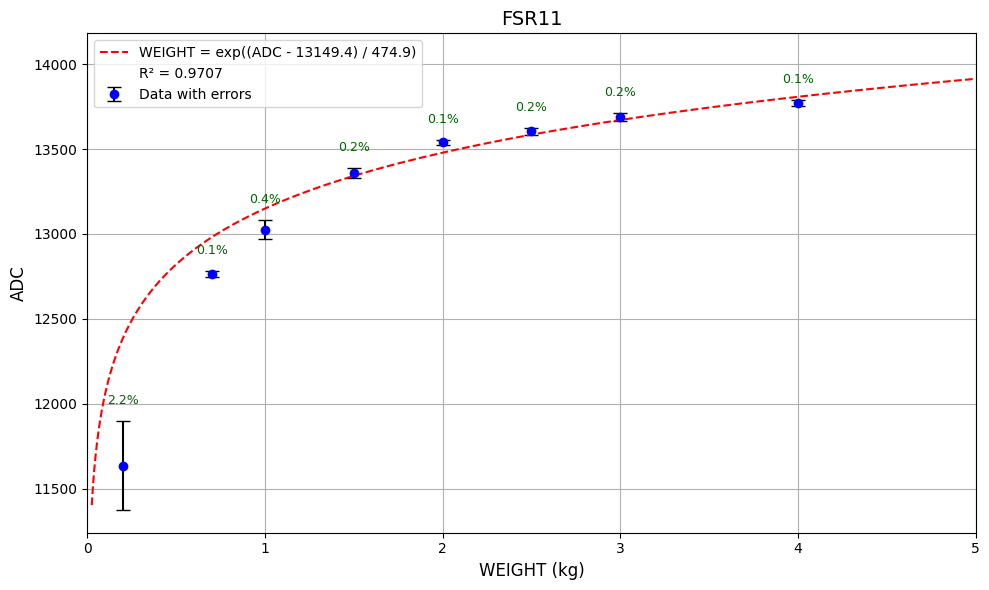

In [12]:
fsr11_model = analyze_fsr('FSR11')

new_adc = 18500
predicted_weight = fsr11_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR13 model: Cân nặng = exp((ADC - 13838.66) / 325.14)
R² score: 0.988879

Predicted values:
ADC: 17000.00 → Cân nặng: 16696.0889 kg
ADC: 18000.00 → Cân nặng: 361676.4359 kg
ADC: 19000.00 → Cân nặng: 7834759.6732 kg
ADC: 20000.00 → Cân nặng: 169719265.7442 kg
ADC: 21000.00 → Cân nặng: 3676517259.7781 kg
ADC: 22000.00 → Cân nặng: 79641984674.9885 kg
For ADC = 12865, predicted weight = 0.0501 kg


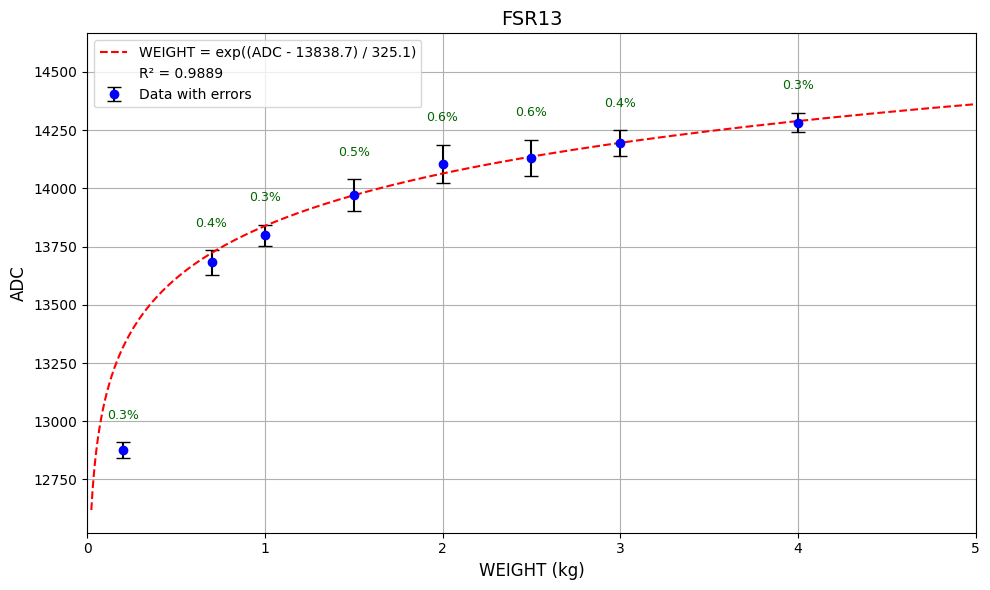

In [13]:
fsr13_model = analyze_fsr('FSR13')

new_adc = 12865
predicted_weight = fsr13_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR14 model: Cân nặng = exp((ADC - 13646.42) / 406.20)
R² score: 0.972012

Predicted values:
ADC: 17000.00 → Cân nặng: 3850.1890 kg
ADC: 18000.00 → Cân nặng: 45147.4765 kg
ADC: 19000.00 → Cân nặng: 529401.1889 kg
ADC: 20000.00 → Cân nặng: 6207780.3843 kg
ADC: 21000.00 → Cân nặng: 72792691.2598 kg
ADC: 22000.00 → Cân nặng: 853570128.5853 kg
For ADC = 15000, predicted weight = 28.0014 kg


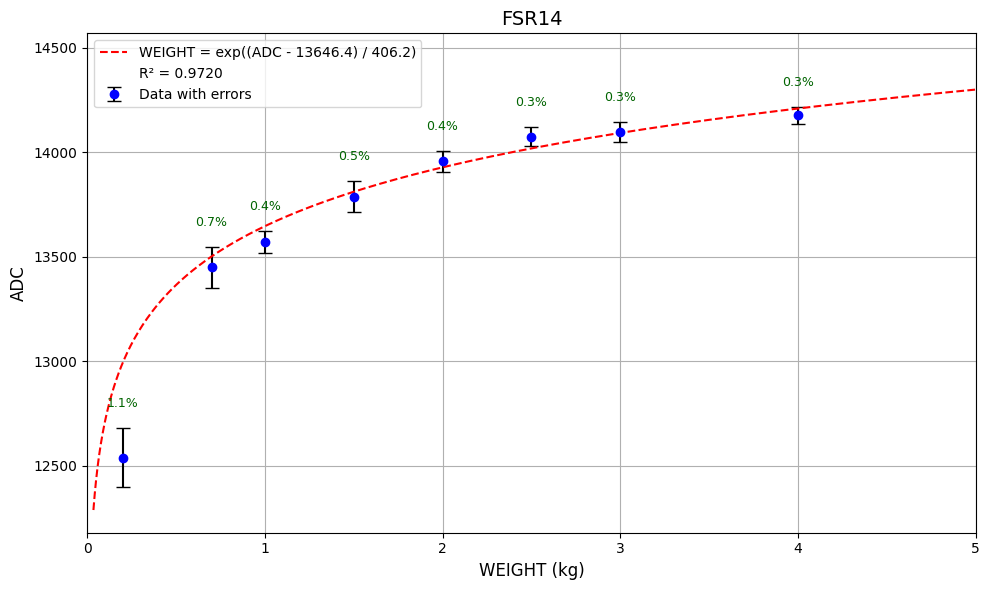

In [14]:
fsr14_model = analyze_fsr('FSR14')

new_adc = 15000
predicted_weight = fsr14_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR15 model: Cân nặng = exp((ADC - 16748.82) / 554.77)
R² score: 0.984402

Predicted values:
ADC: 17000.00 → Cân nặng: 1.5727 kg
ADC: 18000.00 → Cân nặng: 9.5382 kg
ADC: 19000.00 → Cân nặng: 57.8496 kg
ADC: 20000.00 → Cân nặng: 350.8593 kg
ADC: 21000.00 → Cân nặng: 2127.9720 kg
ADC: 22000.00 → Cân nặng: 12906.2118 kg
For ADC = 15000, predicted weight = 0.0428 kg


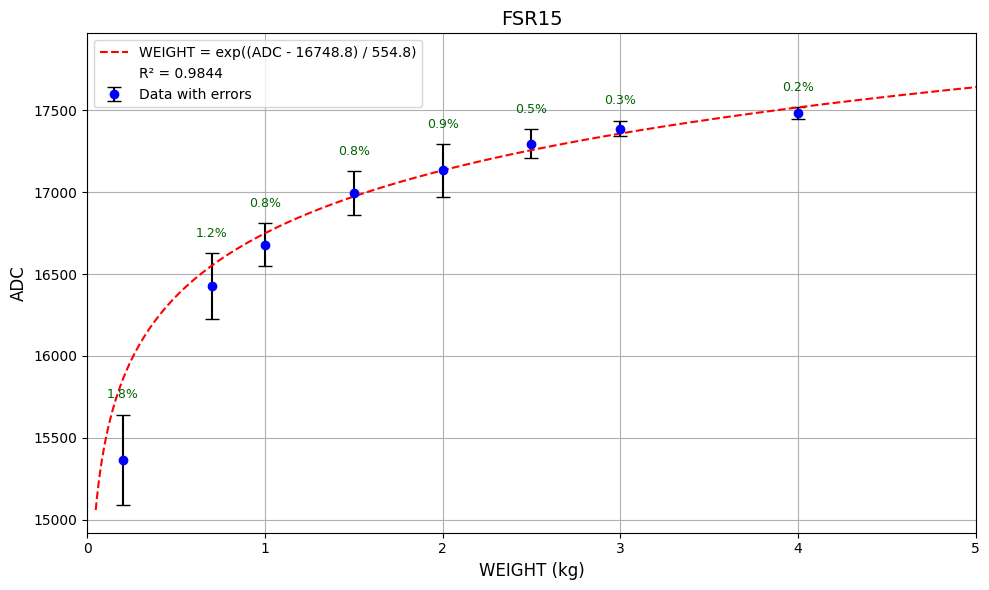

In [15]:
fsr15_model = analyze_fsr('FSR15')

new_adc = 15000
predicted_weight = fsr15_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

FSR16 model: Cân nặng = exp((ADC - 16852.40) / 407.52)
R² score: 0.994377

Predicted values:
ADC: 17000.00 → Cân nặng: 1.4365 kg
ADC: 18000.00 → Cân nặng: 16.7104 kg
ADC: 19000.00 → Cân nặng: 194.3935 kg
ADC: 20000.00 → Cân nặng: 2261.3912 kg
ADC: 21000.00 → Cân nặng: 26306.9029 kg
ADC: 22000.00 → Cân nặng: 306029.8238 kg
For ADC = 15000, predicted weight = 0.0106 kg


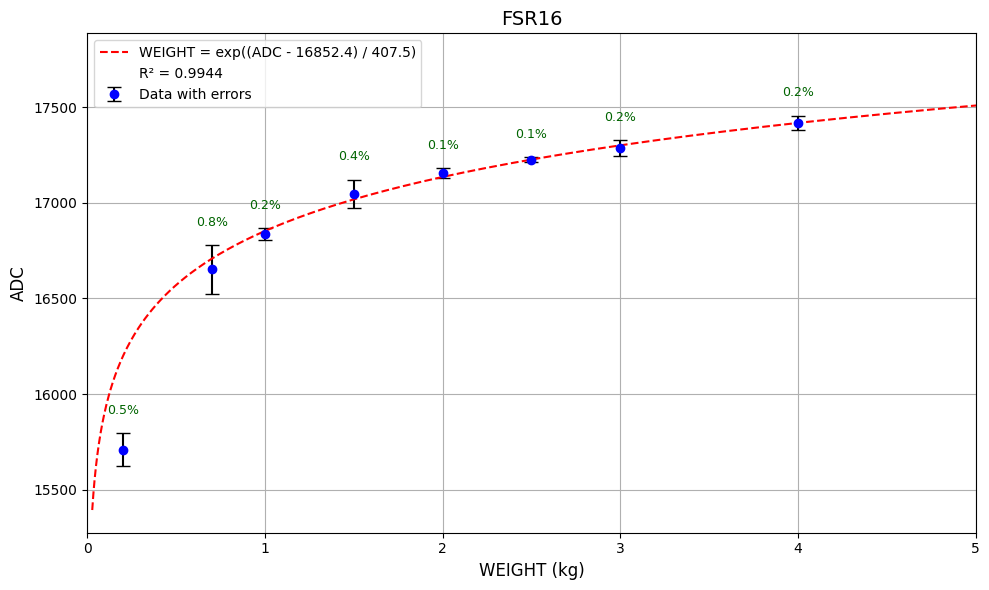

In [16]:
fsr16_model = analyze_fsr('FSR16')

new_adc = 15000
predicted_weight = fsr16_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

MIC1 model: Cân nặng = exp((ADC - 18157.31) / 2613.63)
R² score: 0.963718

Predicted values:
ADC: 17000.00 → Cân nặng: 0.6422 kg
ADC: 18000.00 → Cân nặng: 0.9416 kg
ADC: 19000.00 → Cân nặng: 1.3805 kg
ADC: 20000.00 → Cân nặng: 2.0239 kg
ADC: 21000.00 → Cân nặng: 2.9673 kg
ADC: 22000.00 → Cân nặng: 4.3503 kg
For ADC = 15000, predicted weight = 0.2988 kg


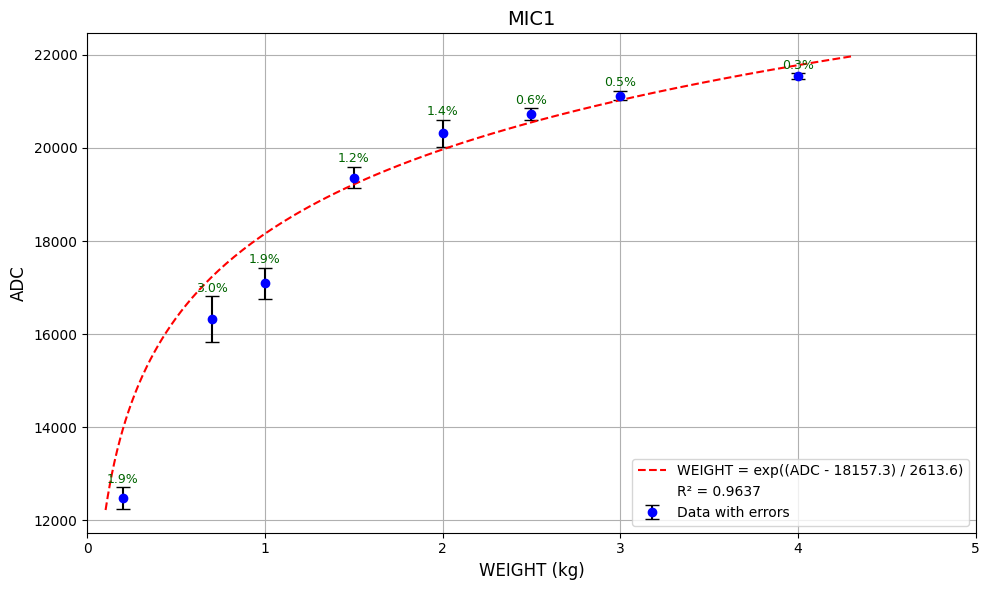

In [17]:
MIC1_model = analyze_fsr('MIC1')

new_adc = 15000
predicted_weight = MIC1_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")

MIC2 model: Cân nặng = exp((ADC - 22285.84) / 1083.94)
R² score: 0.970124

Predicted values:
ADC: 17000.00 → Cân nặng: 0.0076 kg
ADC: 18000.00 → Cân nặng: 0.0192 kg
ADC: 19000.00 → Cân nặng: 0.0482 kg
ADC: 20000.00 → Cân nặng: 0.1214 kg
ADC: 21000.00 → Cân nặng: 0.3054 kg
ADC: 22000.00 → Cân nặng: 0.7682 kg
For ADC = 15000, predicted weight = 0.0012 kg


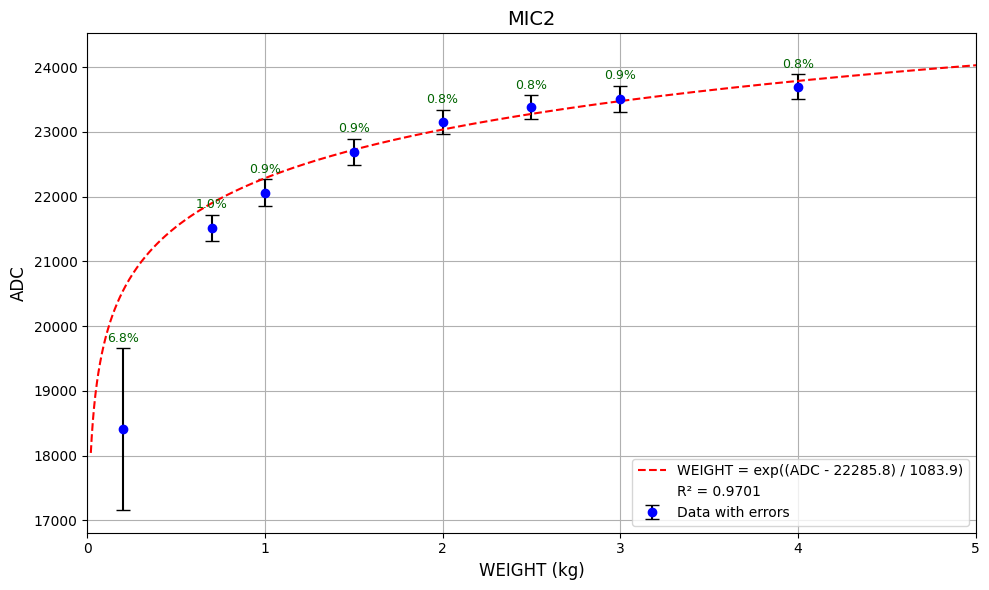

In [18]:
MIC2_model = analyze_fsr('MIC2')

new_adc = 15000
predicted_weight = MIC2_model['predict_function'](new_adc)
print(f"For ADC = {new_adc}, predicted weight = {predicted_weight:.4f} kg")